In [24]:
import pandas as pd

# Load kedua file
df_clean = pd.read_csv('teks_cleaning.csv')
df_bow = pd.read_csv('teks_bow.csv')

# Gabungkan label dari df_clean ke df_bow berdasarkan index
df_bow['label_teks'] = df_clean['label']

In [25]:
df_bow.to_csv('bow_label.csv', index=False)

In [26]:
# 4️⃣ Hitung frekuensi total kata untuk masing-masing label (AI=1, Non-AI=0)
jumlah_ai = df_bow[df_bow['label_teks'] == 1].drop(columns='label_teks').sum(axis=0)
jumlah_nonai = df_bow[df_bow['label_teks'] == 0].drop(columns='label_teks').sum(axis=0)

# 5️⃣ Hitung selisih frekuensi antara AI dan Non-AI
selisih = jumlah_ai - jumlah_nonai

# 6️⃣ Normalisasi min-max bobot kata (skala 0-1, AI mendekati 1, Non-AI mendekati 0)
min_selisih = selisih.min()
max_selisih = selisih.max()

bobot = (selisih - min_selisih) / (max_selisih - min_selisih)

# 7️⃣ Gabungkan ke DataFrame hasil
df_bobot = pd.DataFrame({
    'Kata': selisih.index,
    'Frekuensi_AI': jumlah_ai.values,
    'Frekuensi_NonAI': jumlah_nonai.values,
    'Selisih': selisih.values,
    'rasio_bobot_kata': bobot.values
})

# 8️⃣ Simpan hasil bobot ke CSV
df_bobot.to_csv('bobot_kata_bow.csv', index=False)

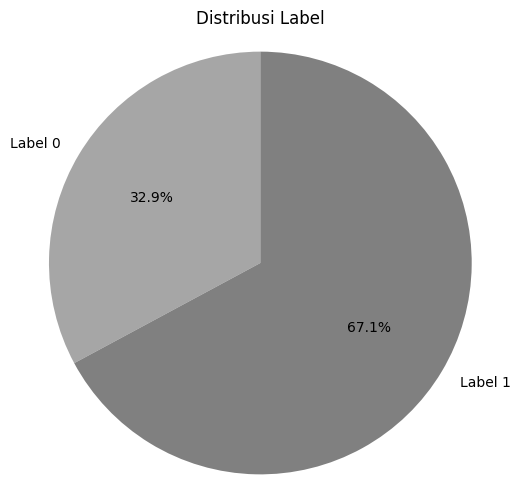

In [33]:
import matplotlib.pyplot as plt

# Data
labels = ['Label 0', 'Label 1']
sizes = [285.945455, 584.330189]
colors = ['#a6a6a6', 'grey']


# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribusi Label')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()
